In [17]:
%load_ext autoreload
%autoreload 2

#Import des packages pre-conçus
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import segmentation_models as sm
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#import des packages créés

#import sys
#sys.path.append('/Users/kany/code/TigerManon/drive-on-mars/drive_on_mars/model')

from drive_on_mars.model.model import initialize_model, compile_model, train_model
from drive_on_mars.model.registry import save_model, save_results, load_model
from drive_on_mars.model.data import create_df, preproc_image, load_mask, preproc, load_preproc, decompose_label, load_images


In [5]:
# Prediction : load le model
model = load_model('/Users/kany/code/TigerManon/drive-on-mars/raw_data/models/unet_4deep_16in_12k_img_256pix.h5')

#model = load_model()



Load latest model from local registry...

Load latest model from disk...
✅ Model compiled
✅ Model loaded from local disk


In [38]:
# Preprocess d'une seule image
img_test = '/Users/kany/code/TigerManon/drive-on-mars/raw_data/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_403797481EDR_F0050104NCAM00322M1.JPG'
X_pred_processed = preproc_image(img_test)
X_pred_processed = np.array([X_pred_processed])
X_pred_processed.shape


(1, 256, 256, 3)

In [39]:
# Créer la prediction
y_pred = model.predict(X_pred_processed)
print(f"✅ pred() done")
y_pred.shape


1/1 [==============================] - 1s 512ms/step
✅ pred() done


(1, 256, 256, 5)

In [40]:
layer_0 = y_pred[0][:,:,0]
layer_1= y_pred[0][:,:,1]
layer_2 = y_pred[0][:,:,2]
layer_3 = y_pred[0][:,:,3]
layer_4 = y_pred[0][:,:,4]

image = cv2.imread(img_test)


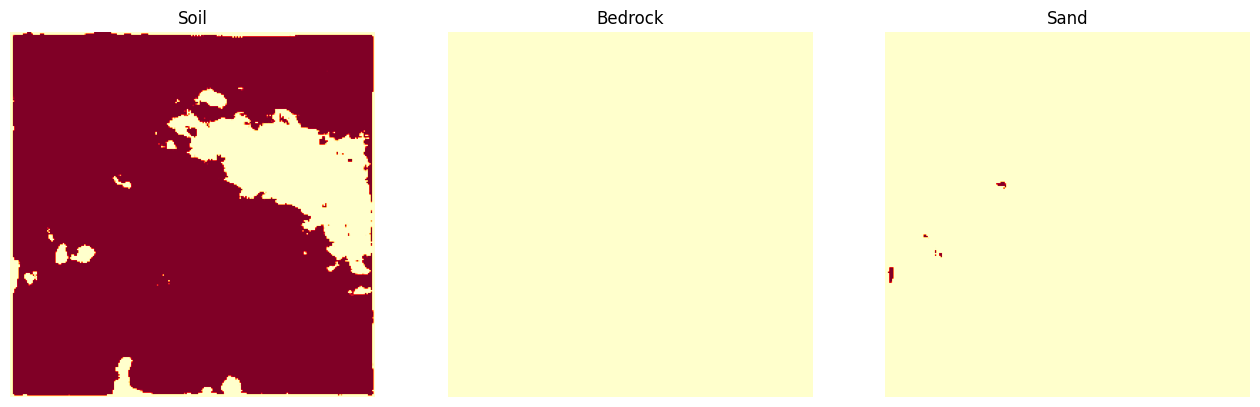

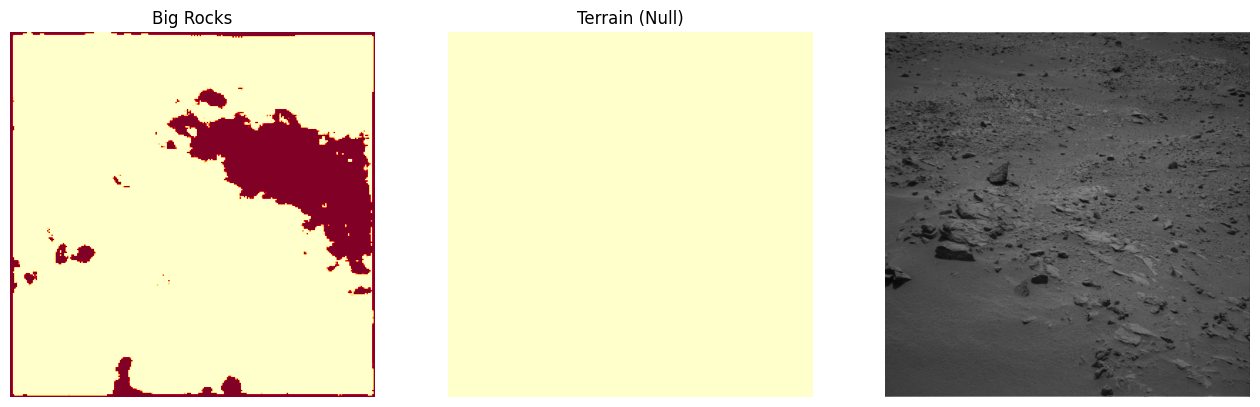

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_0, cmap='YlOrRd')
ax[0].set_title('Soil')
ax[1].axis('off')
ax[1].imshow(layer_1, cmap='YlOrRd')
ax[1].set_title('Bedrock')
ax[2].axis('off')
ax[2].imshow(layer_2, cmap='YlOrRd')
ax[2].set_title('Sand')

fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_3, cmap='YlOrRd')
ax[0].set_title('Big Rocks')
ax[1].axis('off')
ax[1].imshow(layer_4,cmap='YlOrRd')
ax[1].set_title('Terrain (Null)')

ax[2].axis('off')
ax[2].imshow(image,cmap='gray')

# ax[2].imshow(la, alpha =0.6, cmap='YlOrRd')
# ax[2].set_title('All')


In [ ]:
"""
def show_labels_indv(label,image):
    """

    """

    label_0, label_1, label_2, label_3, label_4 = decompose_label(label)

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_0, cmap='YlOrRd')
    ax[0].set_title('Soil')
    ax[1].axis('off')
    ax[1].imshow(label_1, cmap='YlOrRd')
    ax[1].set_title('Bedrock')
    ax[2].axis('off')
    ax[2].imshow(label_2, cmap='YlOrRd')
    ax[2].set_title('Sand')

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_3, cmap='YlOrRd')
    ax[0].set_title('Big Rocks')
    ax[1].axis('off')
    ax[1].imshow(label_4,cmap='YlOrRd')
    ax[1].set_title('Terrain (Null)')

    ax[2].axis('off')
    ax[2].imshow(image,cmap='gray')
    ax[2].imshow(label, alpha =0.6, cmap='YlOrRd')

    ax[2].set_title('All')

    """
